In [19]:
"""
Script for applying current source density with Laplacian spatial filtering
"""
import numpy as np
from mne.preprocessing._csd import compute_current_source_density
import pickle
import scipy.io as spio
import os
import warnings
import matplotlib
import matplotlib.pyplot as plt

%matplotlib
warnings.filterwarnings("ignore",category=DeprecationWarning)
directory = 'C:/Users/cfcoo/OneDrive - Ulster University/Study_3'

Using matplotlib backend: Qt5Agg


In [23]:
def load_pickle(fname, key):
    f = open(fname,'rb')
    file = pickle.load(f)[key]
    return file

def save_as_pickle(fname, file):
    f = open(fname, 'wb')
    pickle.dump(file, f, pickle.HIGHEST_PROTOCOL)
    f.close()

def save_pickle_and_mat(path, fname, file):
    """
    Function for saving EEG data as both pickle and .mat
    Input - path (str) - location for saving
          - fname (str) - name of saved file
          - file (dict) - data to be saved
          - key (str) - optional key for saving pickle
    """
    epochsArray = file.get_data()
    epochsLabels = get_epoched_labels(file)
    dataAndLabelsM = dict(EEG=epochsArray, labels=epochsLabels) #matlab data
    
    if not os.path.exists(path):
        print("Creating new results file...")
        os.makedirs(path)
        
    dataAndLabelsP = dict(EEG=file, labels=epochsLabels) #matlab data
    
    spio.savemat(f"{path}/{fname}.mat", dataAndLabelsM)
    save_as_pickle(f"{path}/{fname}", dataAndLabelsP)
    
def get_epoched_labels(epochs):
    """
    input (mne.Epochs object)
    output: np.array of associated class labels
    """
    class_labels = []
    for i in epochs.events:
        class_labels.append(i[2])
    return np.array(class_labels)

In [24]:
subj = '02'
sess = 2
categories = ["actionText","combsText","actionImage","combsImage","actionAudio","combsAudio"]
epochedEEG = load_pickle(f"{directory}/Subject_Data/S{subj}/Session_{sess}/EpochedArrays-postICA/actionImage_EEG", "EEG")
path = f"{directory}/Subject_Data/S{subj}/Session_{sess}/EpochedArrays-postICA/"

In [33]:
csd_list = []
for category in categories:
    epochedEEG = load_pickle(f"{path}{category}_EEG", "EEG")
    labels = load_pickle(f"{path}{category}_EEG", "labels")
    epochedCSD = compute_current_source_density(epochedEEG)
    
    save_pickle_and_mat(path, f"{category}_CSD", epochedCSD)
        
    csd_list.append(epochedCSD)

Fitted sphere radius:         1000.0 mm
Origin head coordinates:      0.0 -0.0 0.1 mm
Origin device coordinates:    0.0 -0.0 0.1 mm


<ipython-input-33-c41bade46d03>:5: RuntimeWarning: Estimated head size (1000.0 mm) exceeded 99th percentile for adult head size
  epochedCSD = compute_current_source_density(epochedEEG)


Fitted sphere radius:         1000.0 mm
Origin head coordinates:      0.0 -0.0 0.1 mm
Origin device coordinates:    0.0 -0.0 0.1 mm


<ipython-input-33-c41bade46d03>:5: RuntimeWarning: Estimated head size (1000.0 mm) exceeded 99th percentile for adult head size
  epochedCSD = compute_current_source_density(epochedEEG)


Fitted sphere radius:         1000.0 mm
Origin head coordinates:      0.0 -0.0 0.1 mm
Origin device coordinates:    0.0 -0.0 0.1 mm


<ipython-input-33-c41bade46d03>:5: RuntimeWarning: Estimated head size (1000.0 mm) exceeded 99th percentile for adult head size
  epochedCSD = compute_current_source_density(epochedEEG)


Fitted sphere radius:         1000.0 mm
Origin head coordinates:      0.0 -0.0 0.1 mm
Origin device coordinates:    0.0 -0.0 0.1 mm


<ipython-input-33-c41bade46d03>:5: RuntimeWarning: Estimated head size (1000.0 mm) exceeded 99th percentile for adult head size
  epochedCSD = compute_current_source_density(epochedEEG)


Fitted sphere radius:         1000.0 mm
Origin head coordinates:      0.0 -0.0 0.1 mm
Origin device coordinates:    0.0 -0.0 0.1 mm


<ipython-input-33-c41bade46d03>:5: RuntimeWarning: Estimated head size (1000.0 mm) exceeded 99th percentile for adult head size
  epochedCSD = compute_current_source_density(epochedEEG)


Fitted sphere radius:         1000.0 mm
Origin head coordinates:      0.0 -0.0 0.1 mm
Origin device coordinates:    0.0 -0.0 0.1 mm


<ipython-input-33-c41bade46d03>:5: RuntimeWarning: Estimated head size (1000.0 mm) exceeded 99th percentile for adult head size
  epochedCSD = compute_current_source_density(epochedEEG)


    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


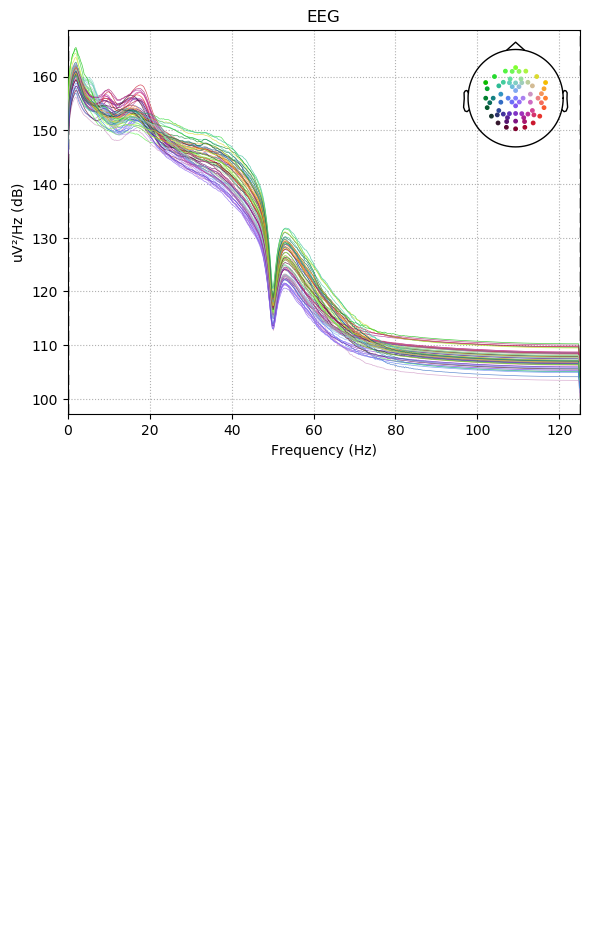

In [23]:
epochedEEG.plot_psd(spatial_colors=True, average=False)
epochedCSD.plot_psd(spatial_colors=True, average=False)

In [6]:
#####set event_ids#####
event_id = {'squeeze': 9, 'jump': 10, 'kiss': 11, 'smile': 12}
epochedEEG.event_id = event_id

In [37]:
%matplotlib
epochedEEG.plot_image(8, cmap='interactive', sigma=1., vmax=7.5, vmin=-7.5)
#epochedEEG.plot()
##plt.plot(epochedEEG.get_data().T[0])

Using matplotlib backend: Qt5Agg
199 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


[<Figure size 640x480 with 4 Axes>]

In [51]:
evoked = epochedEEG['squeeze'].average()
evoked_csd = compute_current_source_density(evoked)

evoked.plot_joint(title='Average Reference', show=False)
evoked_csd.plot_joint(title='Current Source Density - Squeeze').show()

Fitted sphere radius:         1000.0 mm
Origin head coordinates:      0.0 -0.0 0.1 mm
Origin device coordinates:    0.0 -0.0 0.1 mm


<ipython-input-51-e32ae4693e1a>:2: RuntimeWarning: Estimated head size (1000.0 mm) exceeded 99th percentile for adult head size
  evoked_csd = compute_current_source_density(evoked)


Fitted sphere radius:         1000.0 mm
Origin head coordinates:      0.0 -0.0 0.1 mm
Origin device coordinates:    0.0 -0.0 0.1 mm


<ipython-input-52-850c7de95819>:2: RuntimeWarning: Estimated head size (1000.0 mm) exceeded 99th percentile for adult head size
  evoked_csd = compute_current_source_density(evoked)


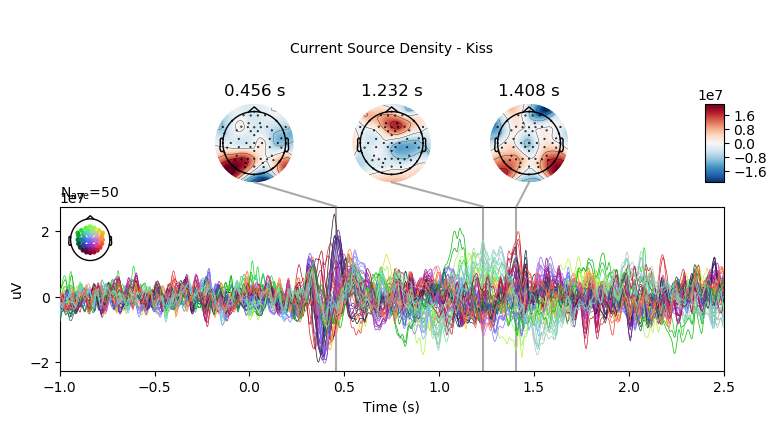

In [52]:
evoked = epochedEEG['kiss'].average()
evoked_csd = compute_current_source_density(evoked)

evoked.plot_joint(title='Average Reference', show=False)
evoked_csd.plot_joint(title='Current Source Density - Kiss')

Fitted sphere radius:         1000.0 mm
Origin head coordinates:      0.0 -0.0 0.1 mm
Origin device coordinates:    0.0 -0.0 0.1 mm


<ipython-input-54-79c9948899e9>:2: RuntimeWarning: Estimated head size (1000.0 mm) exceeded 99th percentile for adult head size
  evoked_csd = compute_current_source_density(evoked)


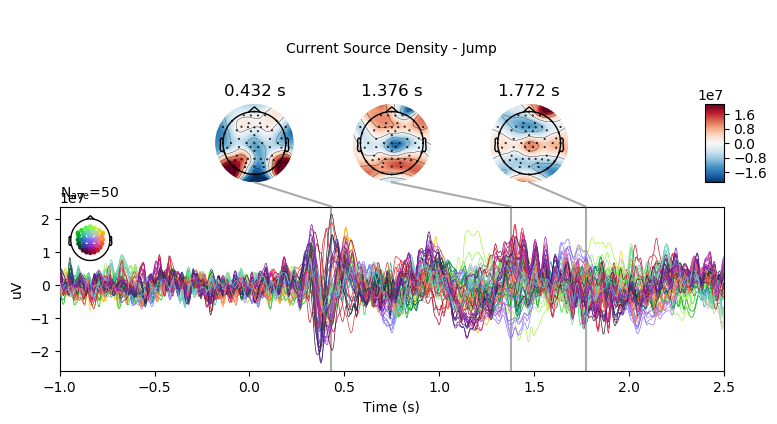

In [54]:
evoked = epochedEEG['jump'].average()
evoked_csd = compute_current_source_density(evoked)

evoked.plot_joint(title='Average Reference', show=False)
evoked_csd.plot_joint(title='Current Source Density - Jump')

Fitted sphere radius:         1000.0 mm
Origin head coordinates:      0.0 -0.0 0.1 mm
Origin device coordinates:    0.0 -0.0 0.1 mm


<ipython-input-53-c1941ca4c2ab>:2: RuntimeWarning: Estimated head size (1000.0 mm) exceeded 99th percentile for adult head size
  evoked_csd = compute_current_source_density(evoked)


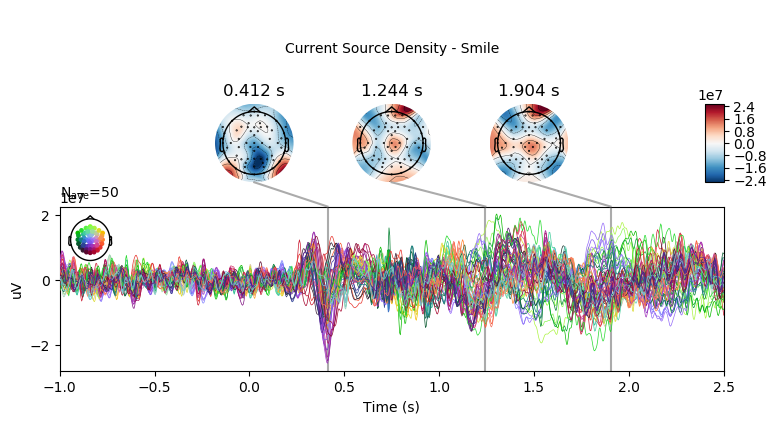

In [53]:
evoked = epochedEEG['smile'].average()
evoked_csd = compute_current_source_density(evoked)

evoked.plot_joint(title='Average Reference', show=False)
evoked_csd.plot_joint(title='Current Source Density - Smile')